#Install YOLOv8

In [1]:
# !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.5 MB/s eta 0:00:00


#Libraries

In [25]:
from ultralytics import YOLO
import torch
from IPython.display import Image

#Train

In [2]:
!yolo detect train data=signature.yaml model=yolov8n.pt epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.17 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=signature.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0

In [3]:
!ls runs/detect/train/weights

best.pt  last.pt


#Model Performance

In [4]:
!cat runs/detect/train/results.csv

epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
1,5.66819,1.16917,3.12945,1.29648,0.00314,0.94286,0.9136,0.82875,0.60095,2.60471,0.85518,0.00016,0.00016,0.00016
2,8.8636,0.81221,1.6042,1.04128,0.69172,0.94286,0.94553,0.87094,0.60069,2.23886,0.83804,0.000333268,0.000333268,0.000333268
3,11.4926,0.69316,1.19599,0.98019,1,0.77246,0.94488,0.88526,0.55589,2.23262,0.8156,0.000499408,0.000499408,0.000499408
4,14.2365,0.71772,1.17484,0.98693,1,0.89281,0.9775,0.84103,0.56381,2.13327,0.83469,0.00065842,0.00065842,0.00065842
5,16.816,0.74705,1.16838,0.99435,0.99269,0.94286,0.94541,0.84363,0.6706,1.88894,0.83829,0.000810304,0.000810304,0.000810304
6,20.3365,0.73185,1.0977,0.98479,1,0.87807,0.94293,0.80156,0.69088,1.67265,0.90383,0.00095506,0.00095506,0.00095506
7,22.9787,0.76199,1.12115,0.99487,0.86397,0.82857,0.83488,0.62006,0.80888,1.35308,0.91697,0.0010

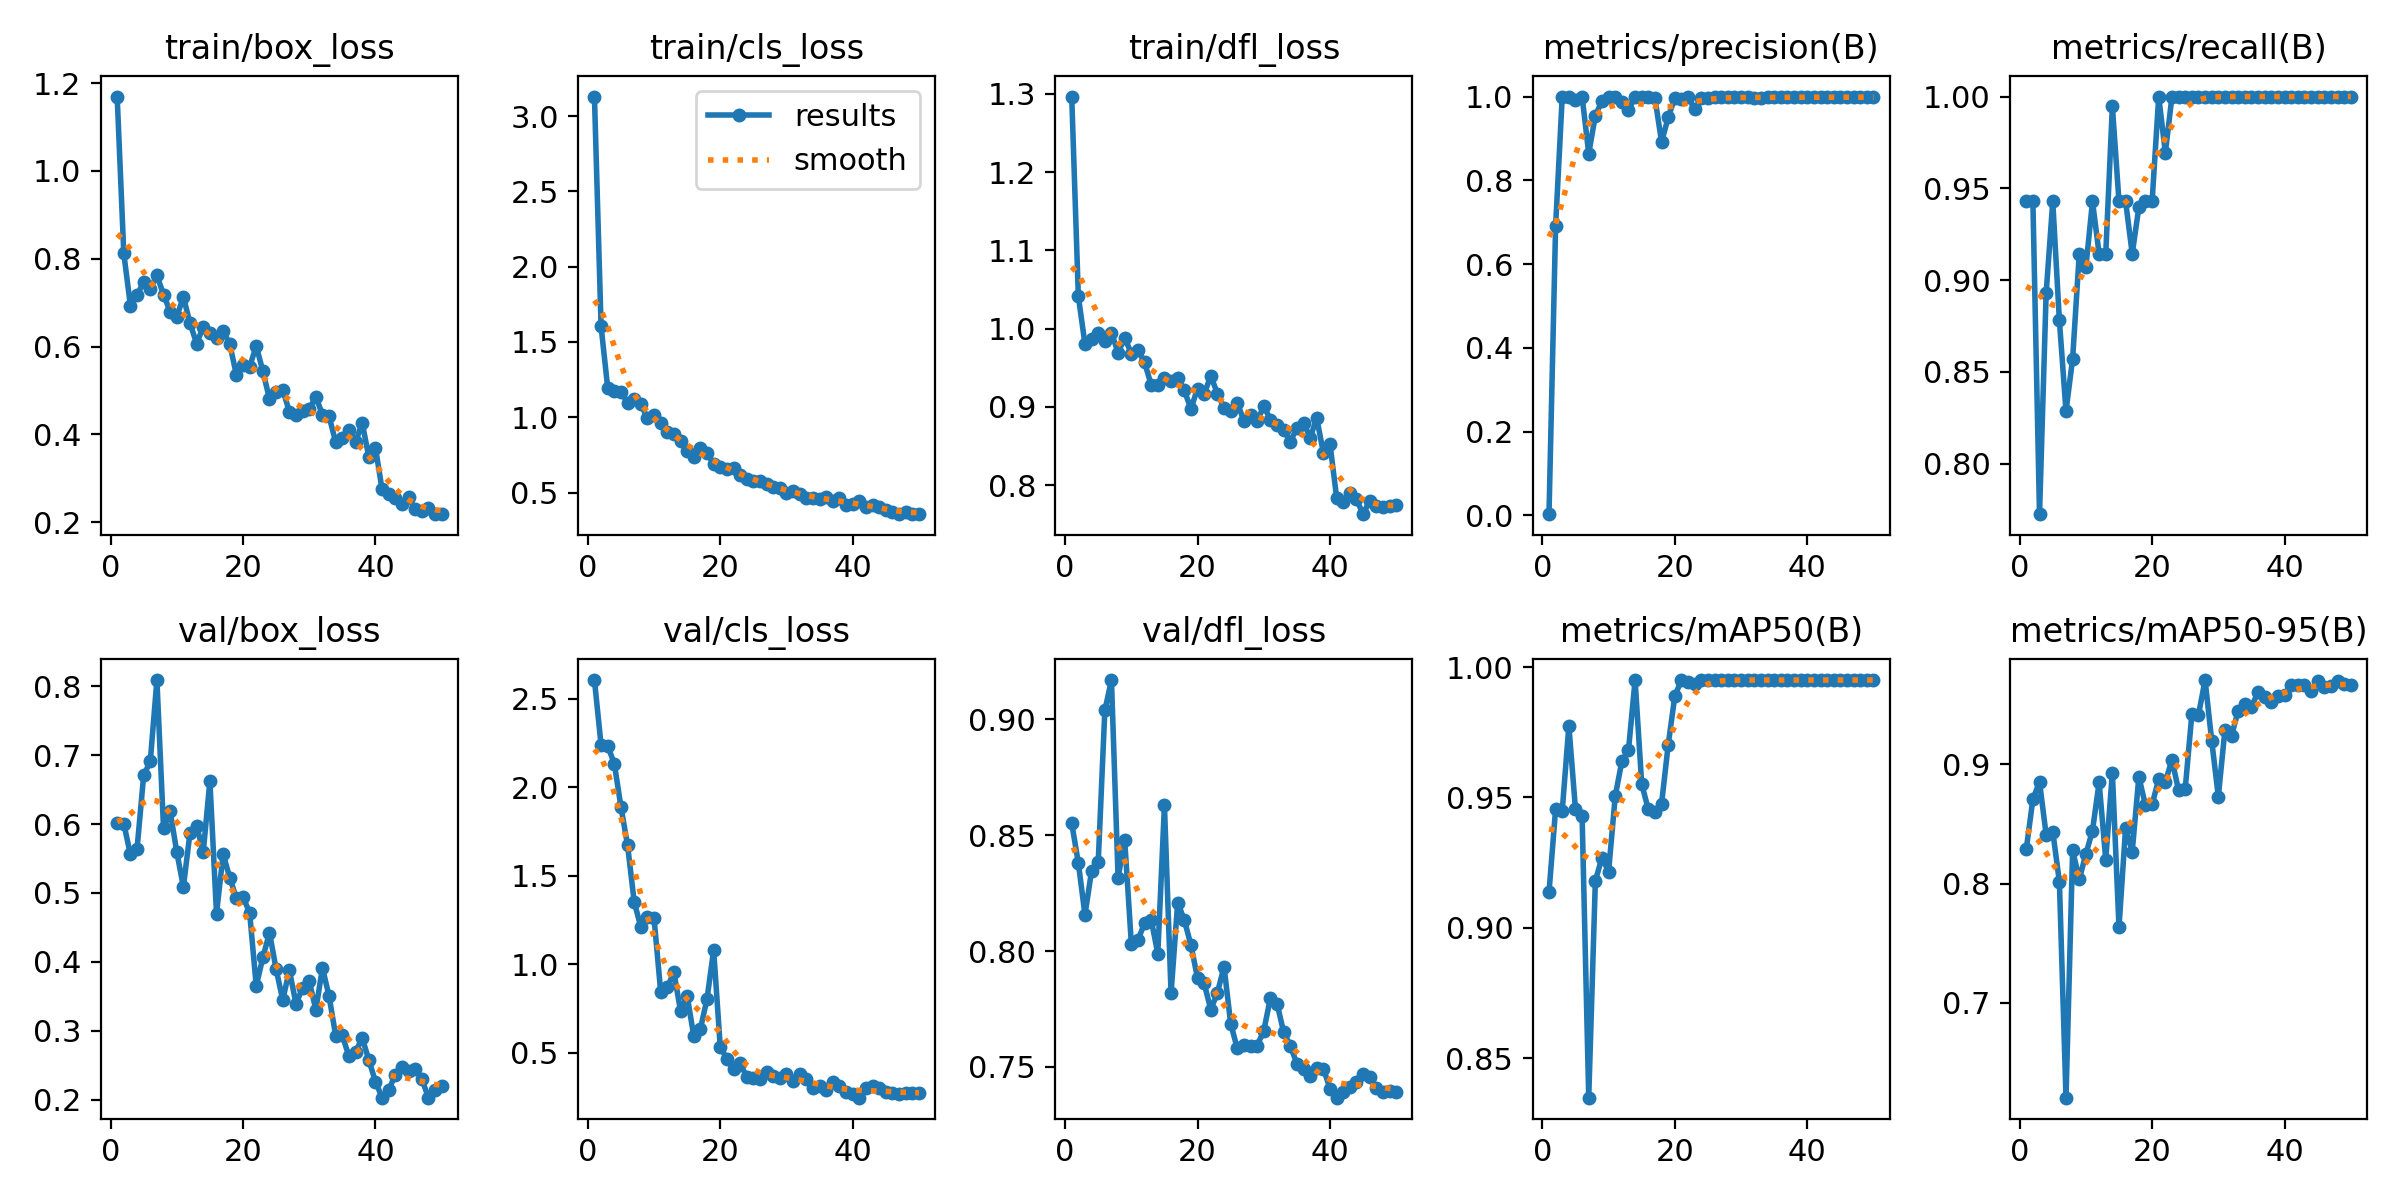

In [5]:
Image("runs/detect/train/results.png")

#Test YOLOv8 on Validation Images

In [7]:
!ls /content

datasets  runs	sample_data  yolo26n.pt  yolov8n.pt


In [8]:
!ls /content/datasets

signature


In [9]:
!ls /content/datasets/signature/images

train  val


In [12]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/datasets/signature/images/val

Ultralytics 8.4.17 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/35 /content/datasets/signature/images/val/Frame_108.jpg: 384x640 1 signature, 43.0ms
image 2/35 /content/datasets/signature/images/val/Frame_132.jpg: 384x640 1 signature, 6.5ms
image 3/35 /content/datasets/signature/images/val/Frame_134.jpg: 384x640 1 signature, 5.9ms
image 4/35 /content/datasets/signature/images/val/Frame_154.jpg: 384x640 1 signature, 5.6ms
image 5/35 /content/datasets/signature/images/val/Frame_160.jpg: 384x640 1 signature, 5.5ms
image 6/35 /content/datasets/signature/images/val/Frame_184.jpg: 384x640 1 signature, 5.5ms
image 7/35 /content/datasets/signature/images/val/Frame_186.jpg: 384x640 1 signature, 5.6ms
image 8/35 /content/datasets/signature/images/val/Frame_244.jpg: 384x640 1 signature, 5.7ms
image 9/35 /content/datasets/signature/images/val/Frame_246.jpg: 384x640 1 signature, 5.9ms
image 1

In [13]:
!ls runs/detect/predict

Frame_108.jpg  Frame_244.jpg  Frame_312.jpg  Frame_346.jpg  Frame_434.jpg
Frame_132.jpg  Frame_246.jpg  Frame_320.jpg  Frame_348.jpg  Frame_440.jpg
Frame_134.jpg  Frame_268.jpg  Frame_322.jpg  Frame_358.jpg  Frame_442.jpg
Frame_154.jpg  Frame_276.jpg  Frame_326.jpg  Frame_376.jpg  Frame_48.jpg
Frame_160.jpg  Frame_298.jpg  Frame_328.jpg  Frame_400.jpg  Frame_58.jpg
Frame_184.jpg  Frame_300.jpg  Frame_338.jpg  Frame_414.jpg  Frame_68.jpg
Frame_186.jpg  Frame_302.jpg  Frame_342.jpg  Frame_422.jpg  Frame_94.jpg


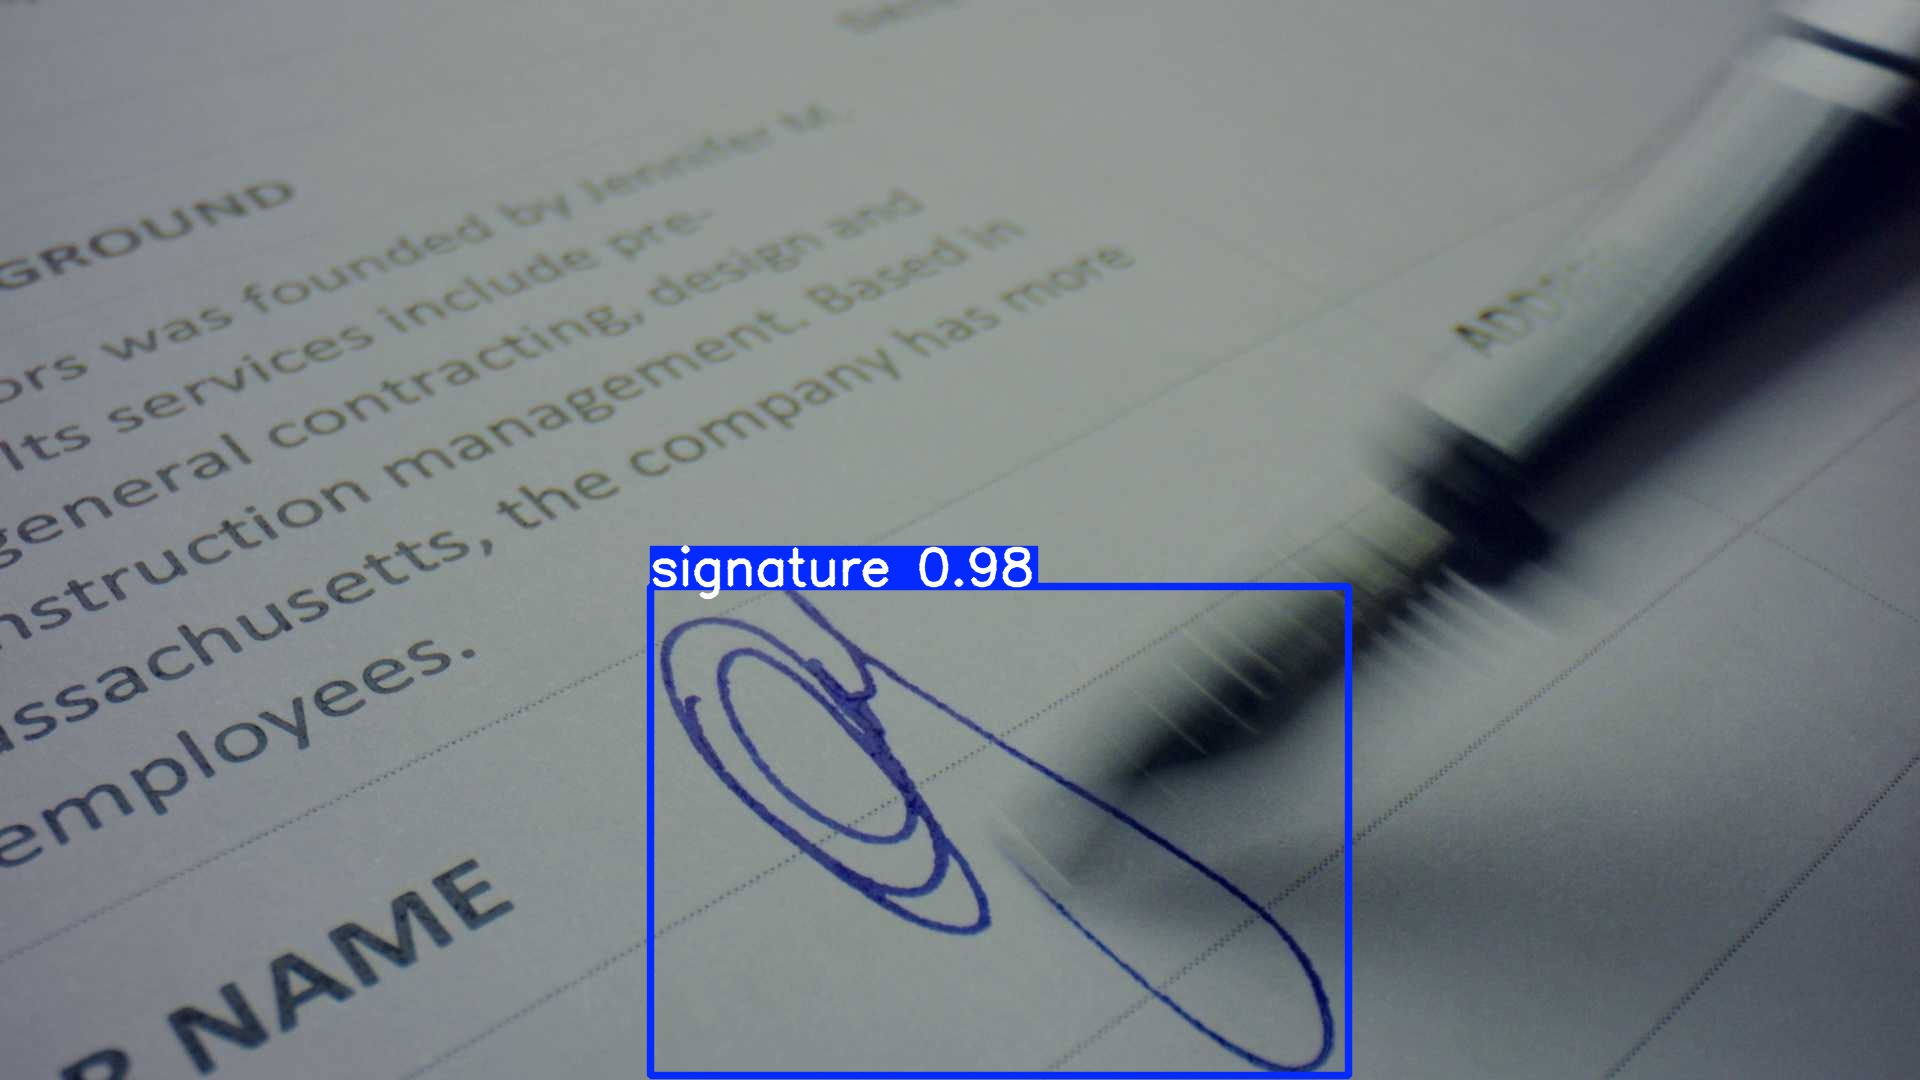

In [14]:
Image("runs/detect/predict/Frame_108.jpg")

model was trained on the Signature Detection Dataset for 50 epochs with an input image size of 640×640.

After training, the following evaluation metrics were observed on the validation dataset:

Precision: ≈ 1.00

Recall: ≈ 1.00

mAP@50: ≈ 0.99

mAP@50–95: ≈ 0.95+

These results indicate that the model successfully learned to detect signatures with very high accuracy and minimal false detections.

#Train YOLOv5

In [15]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17822, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 17822 (delta 14), reused 6 (delta 6), pack-reused 17798 (from 4)
Receiving objects: 100% (17822/17822), 16.99 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (12147/12147), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0


#Train

In [18]:
%%writefile signature.yaml
path: /content/datasets/signature
train: images/train
val: images/val

nc: 1
names: ['signature']

Writing signature.yaml


In [19]:
!python train.py --img 640 --batch 16 --epochs 50 --data signature.yaml --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2026-02-26 11:41:02.799033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772106062.819393    5247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772106062.826188    5247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772106062.843442    5247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772106062.843471    5247 computation_placer.cc:177] computation placer already registere

In [20]:
!ls runs/train/exp/weights

best.pt  last.pt


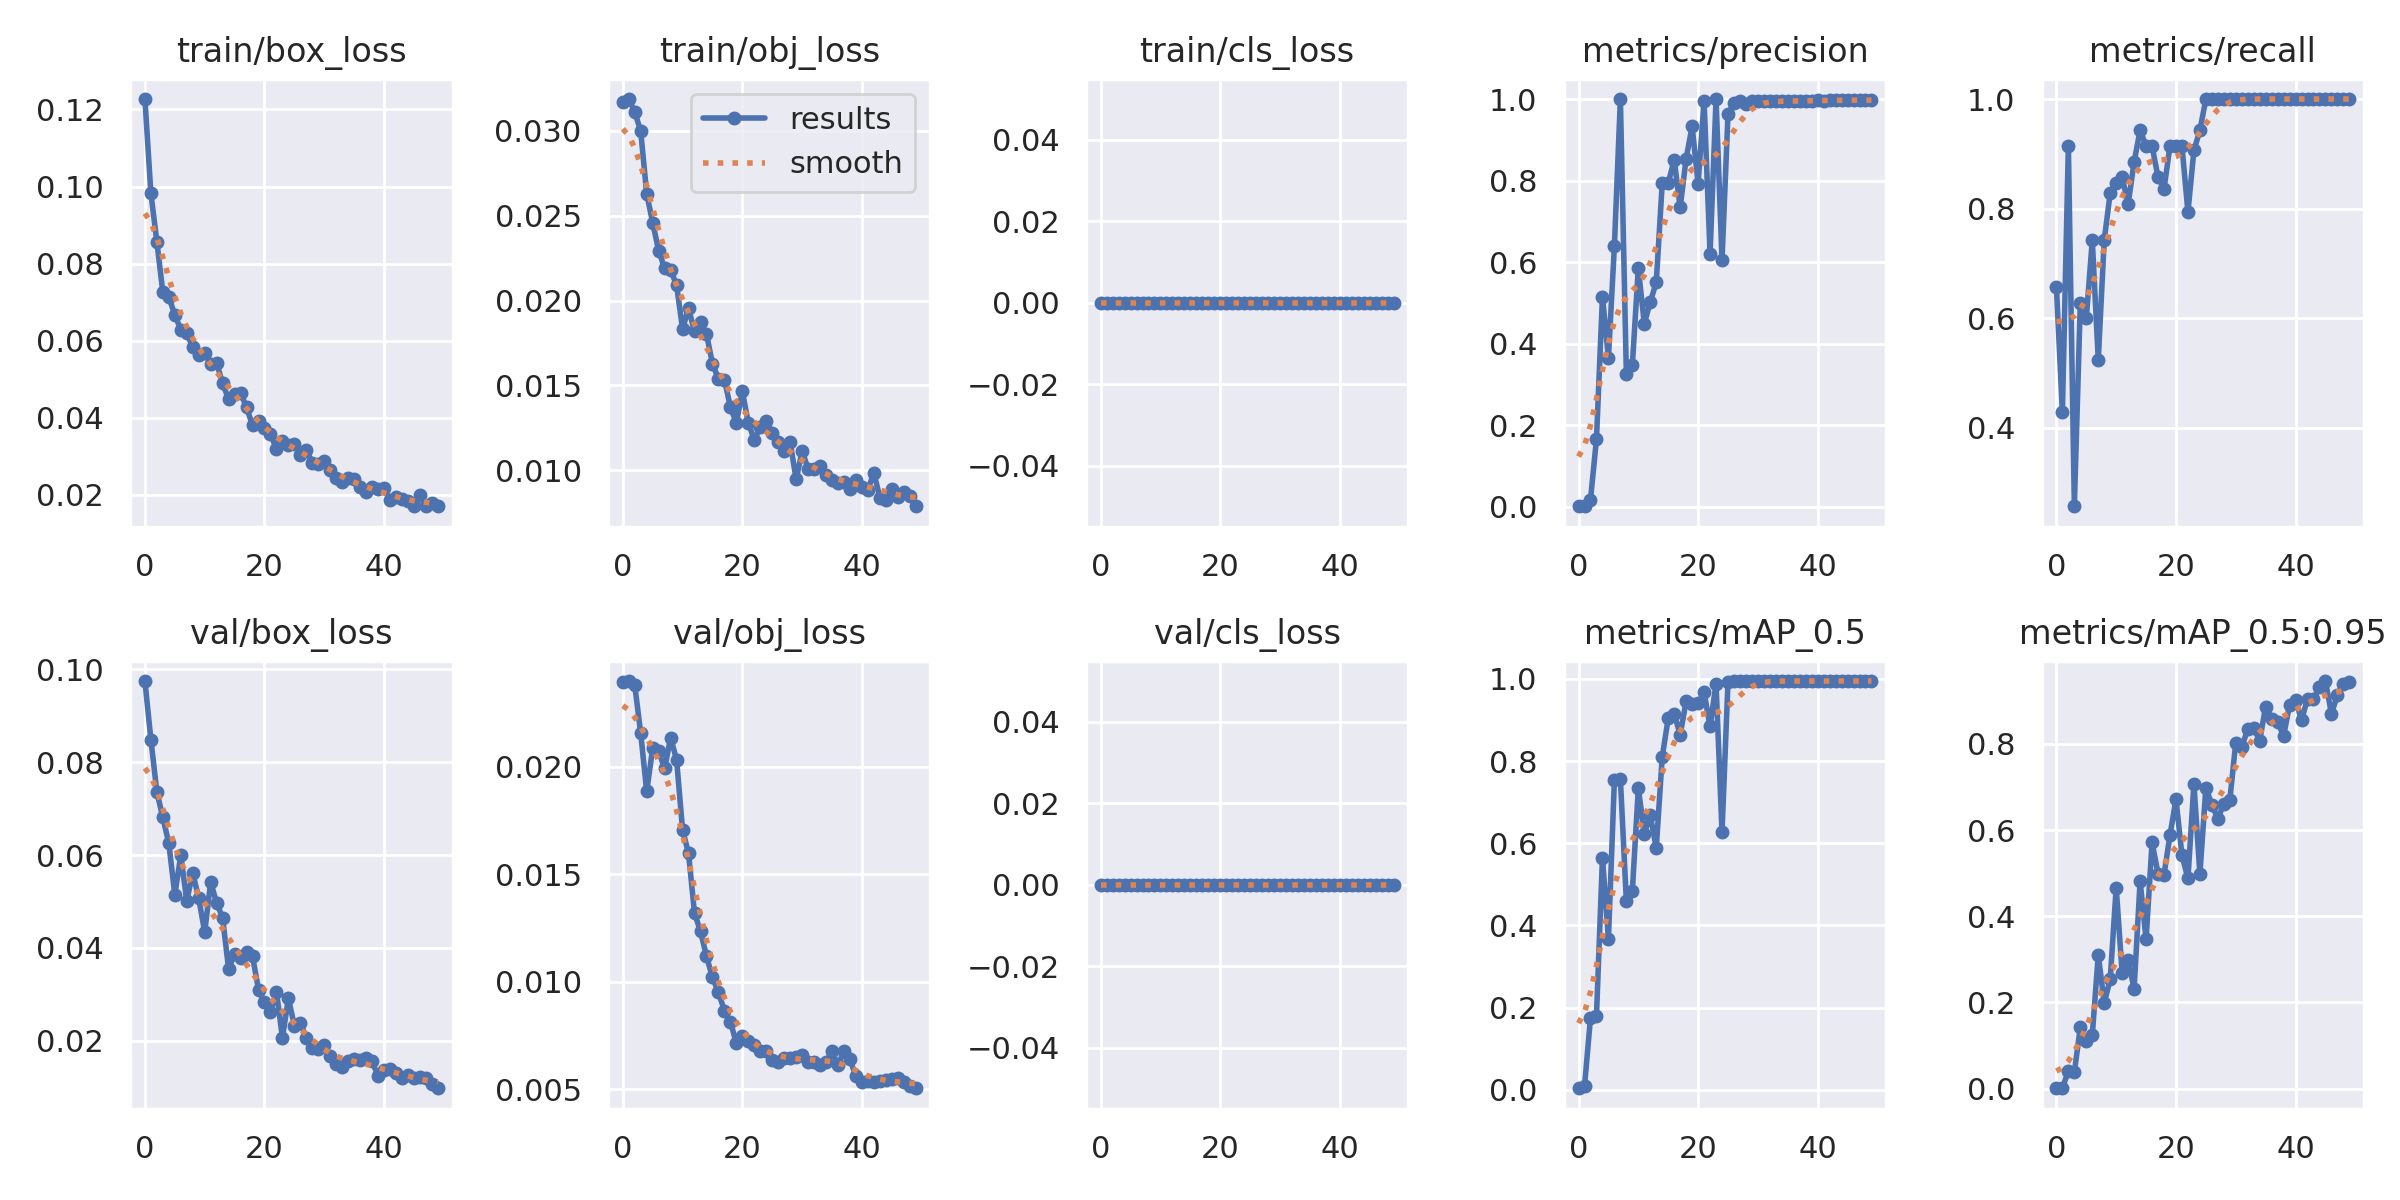

In [21]:
Image("runs/train/exp/results.png")

YOLOv5s (small variant) model was trained on the Signature Detection Dataset for 50 epochs with an input image resolution of 640×640.

After training, the following evaluation metrics were obtained on the validation dataset:

Precision: ≈ 1.00

Recall: ≈ 1.00

mAP@50: ≈ 0.99

mAP@50–95: ≈ 0.93 (approx.)

The training and validation loss curves show steady convergence, indicating stable learning without overfitting.

#Interpretation

YOLOv8 slightly outperforms YOLOv5 in mAP@50–95, indicating better localization accuracy across different IoU thresholds.

#Ensemble Learning

In [24]:
%cd /content

/content


In [26]:
# Load YOLOv8
model_v8 = YOLO("runs/detect/train/weights/best.pt")

# Load YOLOv5
model_v5 = torch.hub.load('ultralytics/yolov5', 'custom',
                          path='yolov5/runs/train/exp/weights/best.pt')

/usr/local/lib/python3.12/dist-packages/torch/hub.py:247: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to load(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  _check_repo_is_trusted(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


YOLOv5 🚀 2026-2-26 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [27]:
image = "/content/datasets/signature/images/val/Frame_108.jpg"

results_v8 = model_v8(image)
results_v5 = model_v5(image)


image 1/1 /content/datasets/signature/images/val/Frame_108.jpg: 384x640 1 signature, 41.6ms
Speed: 3.4ms preprocess, 41.6ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [28]:
conf_v8 = float(results_v8[0].boxes.conf[0])
conf_v5 = float(results_v5.xyxy[0][:,4][0])

ensemble_conf = (conf_v8 + conf_v5) / 2

print("YOLOv8 Confidence:", conf_v8)
print("YOLOv5 Confidence:", conf_v5)
print("Ensemble Confidence:", ensemble_conf)

YOLOv8 Confidence: 0.9828641414642334
YOLOv5 Confidence: 0.8734710216522217
Ensemble Confidence: 0.9281675815582275


#Interpretation

Although YOLOv8 produced the highest individual confidence score, the ensemble approach provides a more balanced and stable prediction by incorporating outputs from both models.

This reduces dependency on a single model and improves reliability in real-world scenarios where predictions may vary.